In [915]:
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader

In [916]:

with open('dataset', 'r', encoding='utf-8') as f:
    dataset = arff.load(f)


df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])

## Data analysis

In [917]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,class
0,1,3,7,4,41,2,17,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,5,1,1,3,64,0,10,0,0,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,2,1,1,2,39,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,3,1,1,1,39,2,12,0,0,1,...,No,No,No,No,No,No,No,No,No,NO
4,3,1,1,3,21,2,23,1,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [918]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   admission_type_id         101766 non-null  int64 
 1   discharge_disposition_id  101766 non-null  int64 
 2   admission_source_id       101766 non-null  int64 
 3   time_in_hospital          101766 non-null  int64 
 4   num_lab_procedures        101766 non-null  int64 
 5   num_procedures            101766 non-null  int64 
 6   num_medications           101766 non-null  int64 
 7   number_outpatient         101766 non-null  int64 
 8   number_emergency          101766 non-null  int64 
 9   number_inpatient          101766 non-null  int64 
 10  number_diagnoses          101766 non-null  int64 
 11  race                      99493 non-null   object
 12  gender                    101766 non-null  object
 13  age                       101766 non-null  object
 14  weig

In [920]:
null_count = df.isnull().sum()
print(null_count)

admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
race                         2273
gender                          0
age                             0
weight                      98569
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [921]:
numeric_val = df.select_dtypes(include=np.number)
object_val = df.select_dtypes(include='object')

In [922]:
numeric_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   num_lab_procedures        101766 non-null  int64
 5   num_procedures            101766 non-null  int64
 6   num_medications           101766 non-null  int64
 7   number_outpatient         101766 non-null  int64
 8   number_emergency          101766 non-null  int64
 9   number_inpatient          101766 non-null  int64
 10  number_diagnoses          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


In [923]:
object_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   payer_code                61510 non-null   object
 5   medical_specialty         51817 non-null   object
 6   diag_1                    101745 non-null  object
 7   diag_2                    101408 non-null  object
 8   diag_3                    100343 non-null  object
 9   max_glu_serum             101766 non-null  object
 10  A1Cresult                 101766 non-null  object
 11  metformin                 101766 non-null  object
 12  repaglinide               101766 non-null  object
 13  nateglinide               101766 non-null  object
 14  chlo

- During data analysis, we found that our dataset has dimensions of 191766 rows and 48 columns

- The column types were numeric and object. There was not a single non-null value in the numeric columns (10 columns). There were more such columns in the object columns (other columns)

## Data preprocessing and normalization

In [924]:
def interval_to_mean(value):
    """Function from interval fo format [...) returns mean of two numbers"""
    parts = value.replace('[', '').replace(']', '').replace('(', '').replace(')', '').split('-')
    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return (int(parts[0]) + int(parts[1])) / 2
    

In [925]:
null_percent = (null_count / len(df)) * 100
cols_over_30 = null_percent[null_percent > 30]
cols_to_drop = cols_over_30.index.tolist()
df = df.drop(cols_to_drop, axis='columns')

- removing columns that have more than 30% NaN values

In [926]:
df = df.drop_duplicates()

- removing duplicates

In [927]:
df['age'] = df['age'].apply(interval_to_mean)
df.loc[(df['age'] < 0) | (df['age'] > 110), 'age'] = np.nan
df['age'] = df['age'].fillna(0)

- normalizing the $age$ column to the mean of the interval

In [928]:
numeric_col: list[str] = df.select_dtypes(include='number').columns # type: ignore

In [929]:
for col in df.select_dtypes(include='object').columns:
    converted = pd.to_numeric(df[col], errors='coerce')
    
    if converted.notna().mean() > 0.5:
        df[col] = converted


- if a column has more than 50% numeric values, then the column should be of type numeric and not object

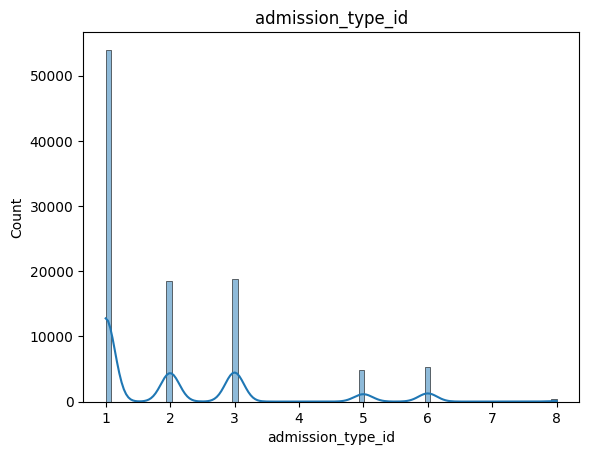

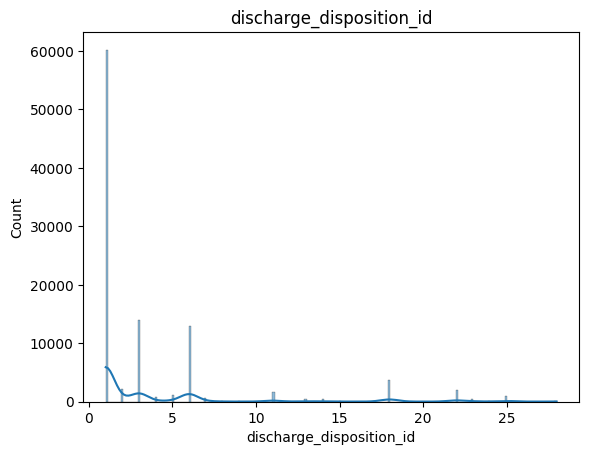

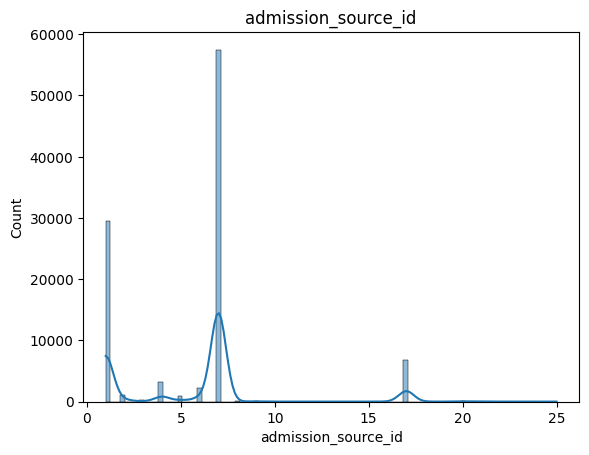

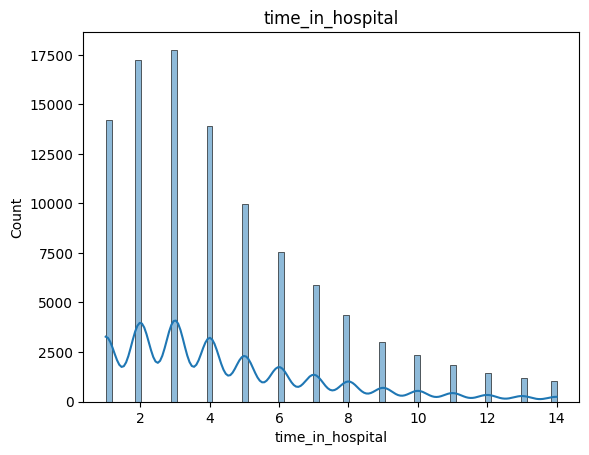

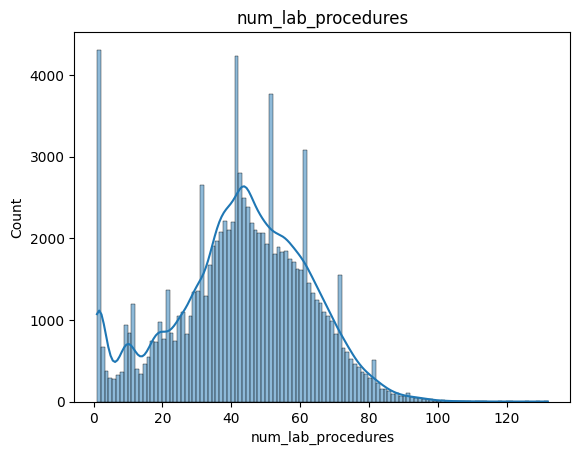

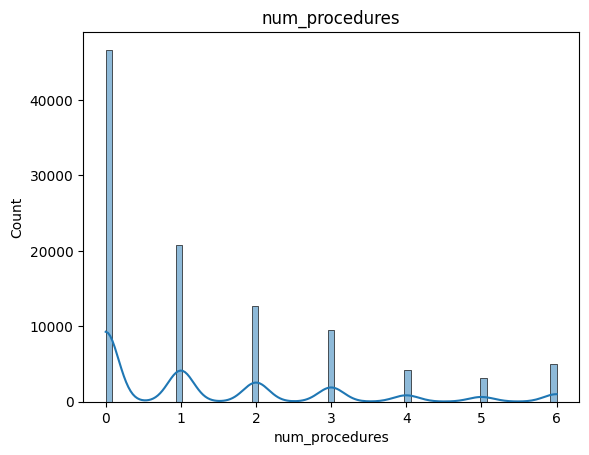

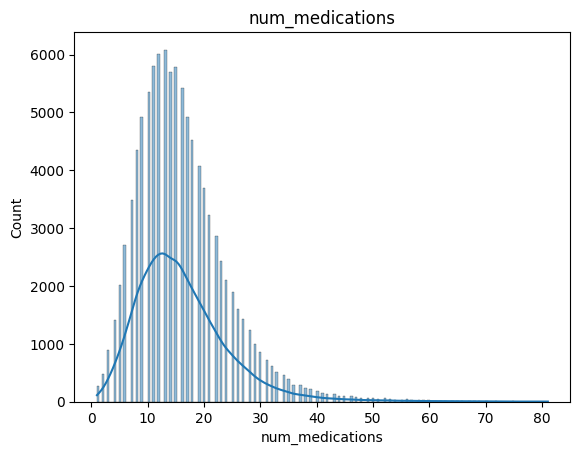

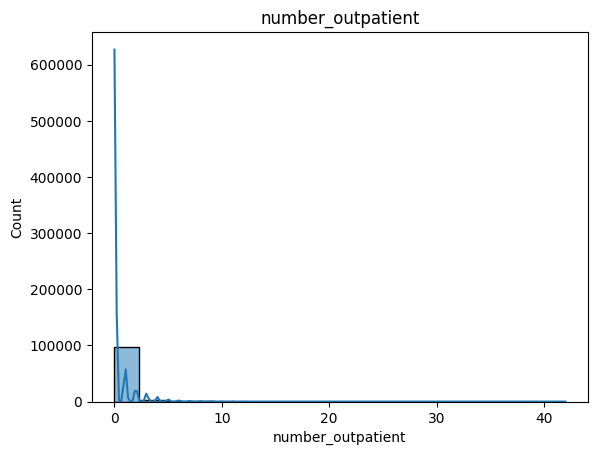

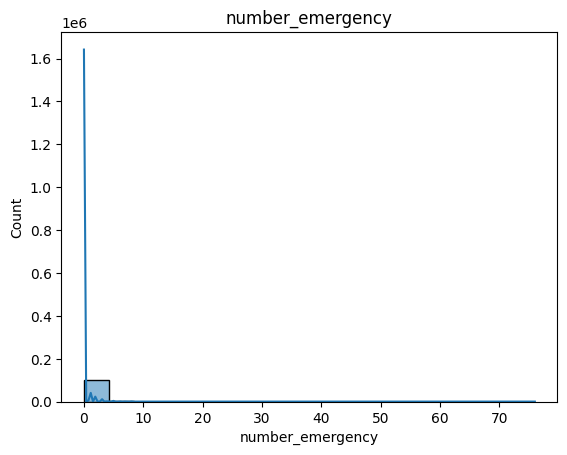

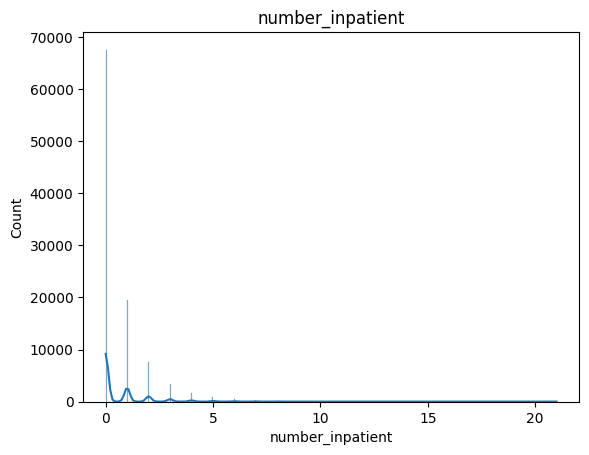

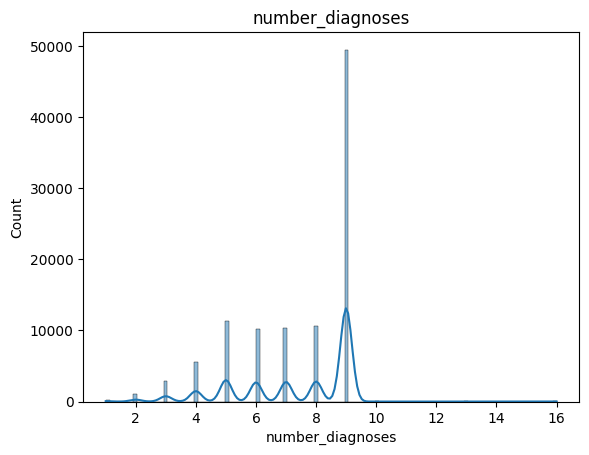

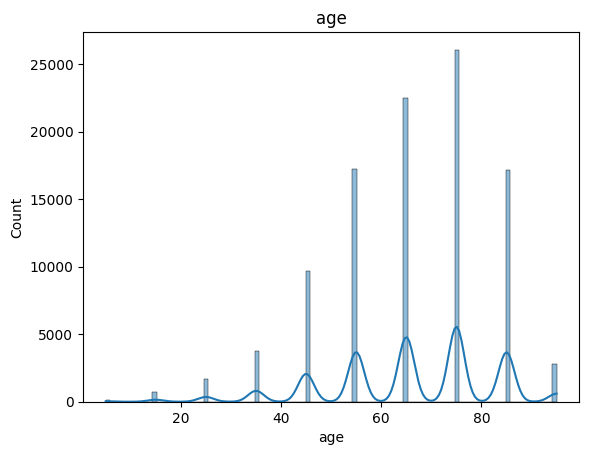

In [930]:
for col in numeric_col:
    sns.histplot(data=df[col], kde=True) # type: ignore
    plt.title(col)
    plt.show()

In [931]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_b = Q1 - 1.5 * iqr
    upper_b = Q3 + 1.5 * iqr
    
    df.loc[(df[col] < lower_b) | (df[col] > upper_b), col] = np.nan
    df[col] = df[col].fillna(df[col].median())
    df[col] = np.log1p(df[col])

- re-format outlayers using log transformation

<Axes: >

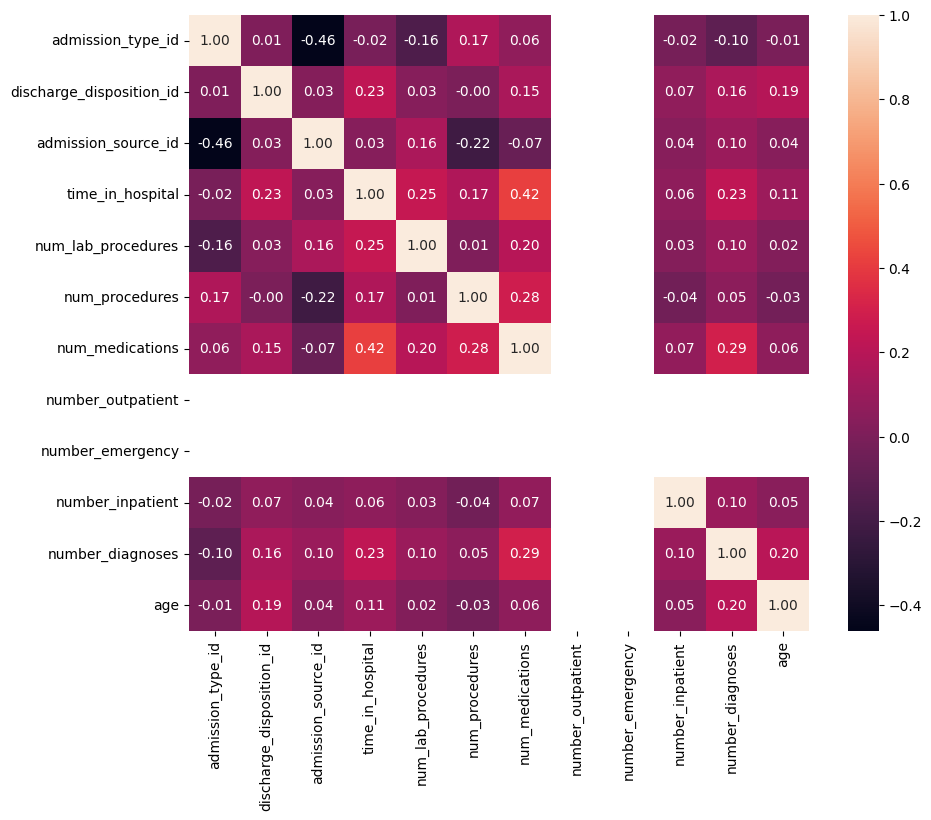

In [932]:
plt.figure(figsize=(10, 8))

sns.heatmap(data=df[numeric_col].corr(),
            cmap="rocket",
            annot=True,
            fmt=".2f"
            )


- on the heatmap we can see that two columns have no values, it is necessary to investigate this further, possibly remove the column

In [933]:
df['number_outpatient'].nunique() == 1

True

In [934]:
df['number_emergency'].nunique() == 1

True

In [935]:
df = df.drop(["number_emergency", "number_outpatient"], axis="columns")

- we removed the columns (number_emergency, number_outpatient) because they only had the value 0

In [936]:
df = df.drop(["admission_type_id", "discharge_disposition_id", "admission_source_id"], axis="columns")

In [937]:
numeric_col: list[str] = df.select_dtypes(include='number').columns # type: ignore

<Axes: >

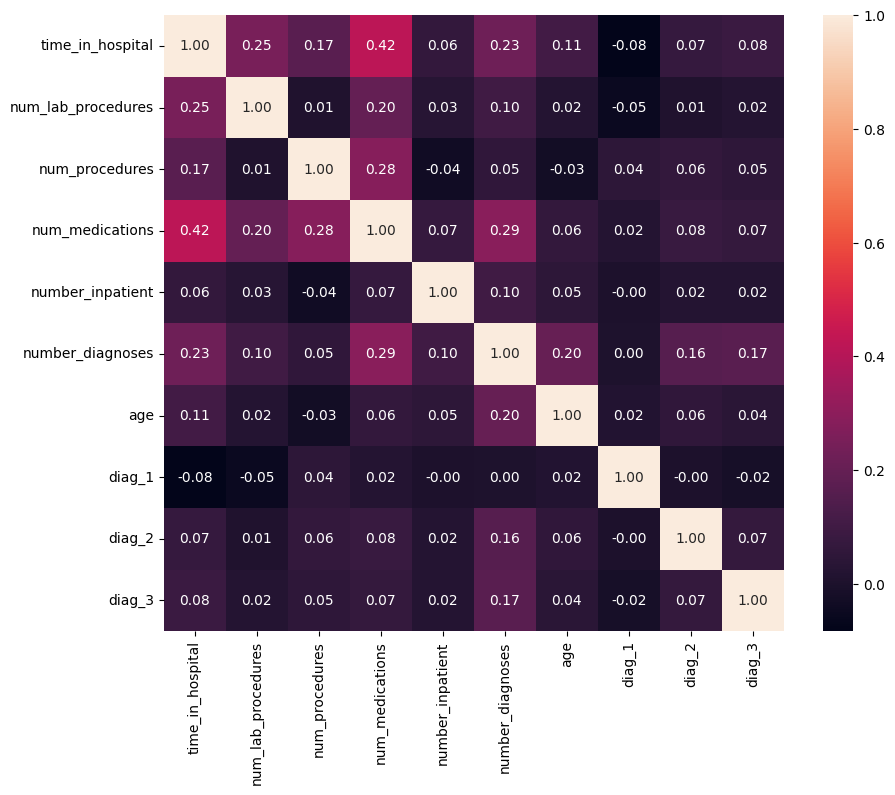

In [938]:
plt.figure(figsize=(10, 8))

sns.heatmap(data=df[numeric_col].corr(),
            cmap="rocket",
            annot=True,
            fmt=".2f"
            )


In [939]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

race: ['AfricanAmerican' 'Caucasian' 'Hispanic' 'Other' None 'Asian']
gender: ['Female' 'Male' 'Unknown/Invalid']
max_glu_serum: ['None' 'Norm' '>300' '>200']
A1Cresult: ['None' '>8' '>7' 'Norm']
metformin: ['No' 'Steady' 'Down' 'Up']
repaglinide: ['No' 'Steady' 'Up' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Up' 'Down']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['Steady' 'No' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Down' 'Up']
acarbose: ['No' 'Steady' 'Down' 'Up']
miglitol: ['No' 'Steady' 'Up' 'Down']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
examide: ['No']
citoglipton: ['No']
insulin: ['Steady' 'No' 'Down' 'Up']
glyburide.metformin: ['No' 'Steady' 'Down' 'Up']
glipizide.metformin: ['No' 'Steady']
glimepiride.pioglitazone: ['No' 'Steady']
metformin.rosiglitazone: ['No' 'Ste

In [940]:
df = df.drop(["examide", "citoglipton"], axis="columns") # mali len hodnotu "NO"

In [941]:
ordinal_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide.metformin', 'glipizide.metformin',
    'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone',
    'diabetesMed'
]

nominal_cols = ['race', 'gender', 'change']

In [942]:
df['class'] = df['class'].map({'>30':0,
                               '<30':1,
                               'NO':2})

In [943]:
mapping_general = {'No': 0, 
                   'Steady': 1, 
                   'Down': 2, 
                   'Up': 3,
                   'Yes': 1
                   }
mapping_max_glu_serum = {'None': 0, 
                         'Norm': 1,
                         '>200': 2,
                         '>300': 3
                         }
mapping_A1Cresult = {'None': 0,
                     'Norm': 1,
                     '>7': 2,
                     '>8': 3
                     }

In [944]:
df["race"] = df["race"].fillna("Unknown")

In [945]:
df["max_glu_serum"] = df["max_glu_serum"].map(mapping_max_glu_serum)
df["A1Cresult"] = df["A1Cresult"].map(mapping_A1Cresult)

for col in ordinal_cols:
    df[col] = df[col].map(mapping_general)

df = pd.get_dummies(df, 
                    columns=nominal_cols, 
                    drop_first=False
                    )

In [946]:
for col in ["diag_1", "diag_2", "diag_3"]:
    df[col] = df[col].fillna(df[col].mean())

In [947]:
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

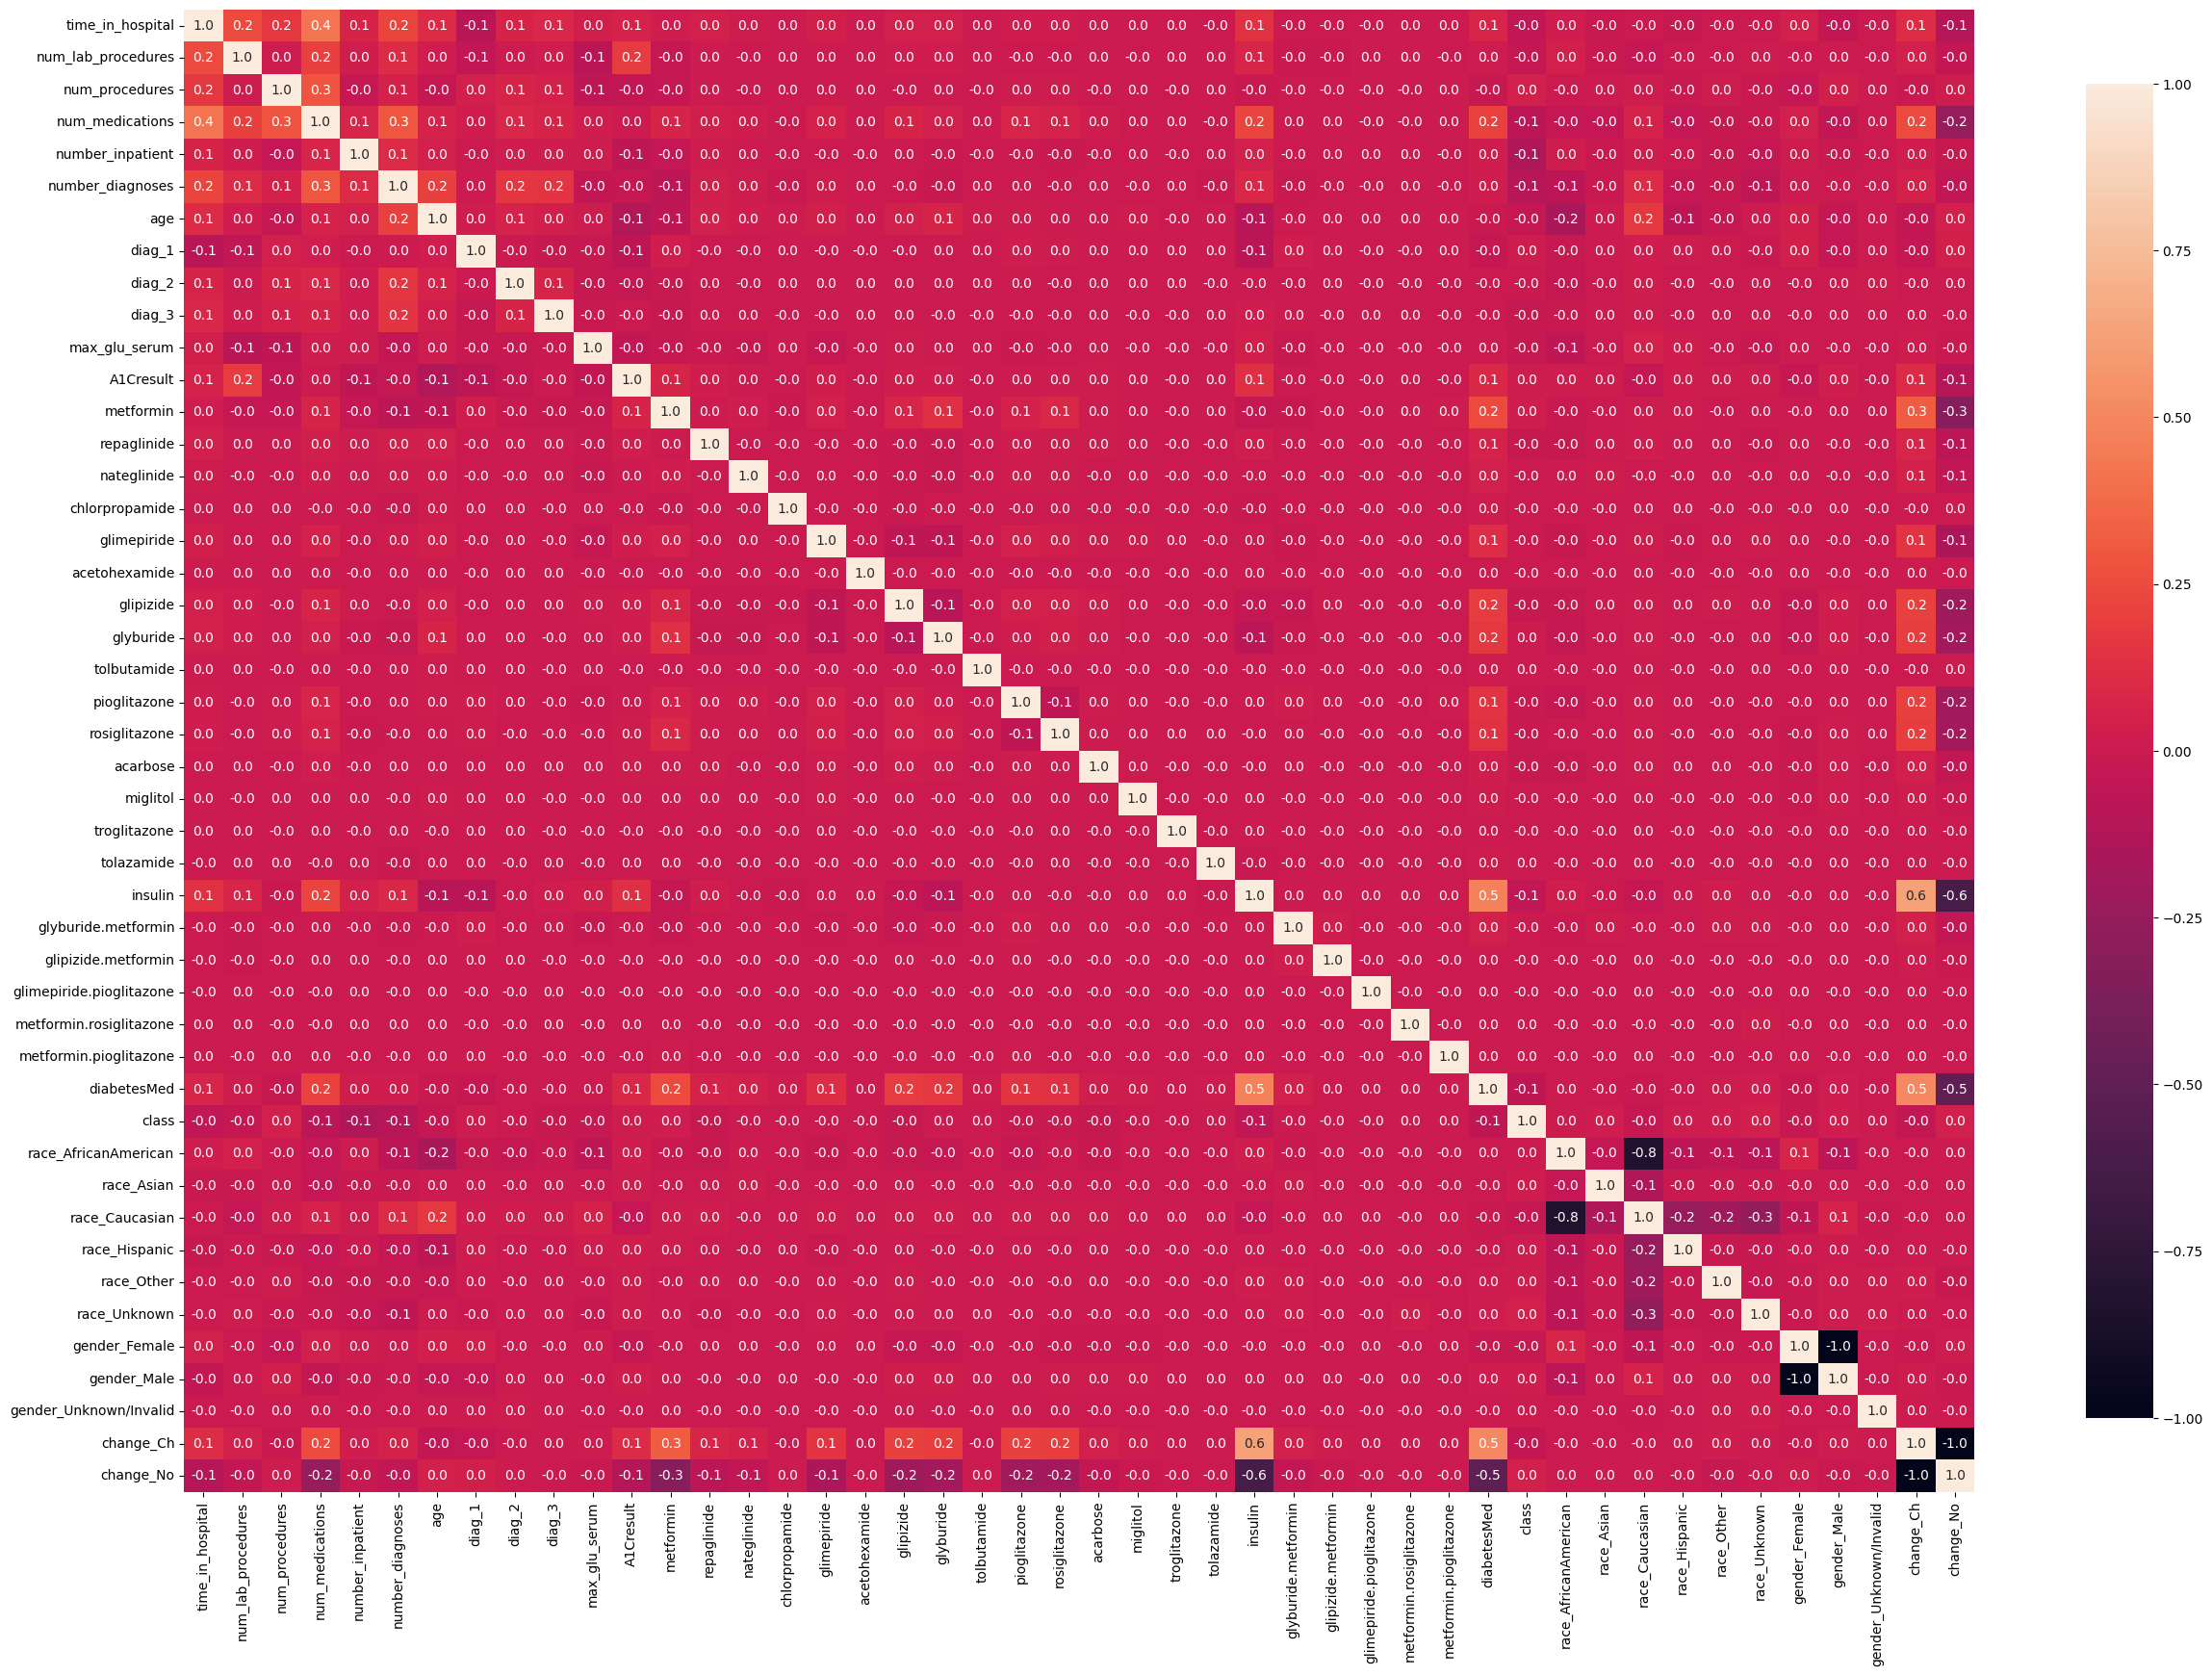

In [948]:
plt.figure(figsize=(30, 20))

sns.heatmap(
    df.corr(),
    cmap="rocket",
    annot=True,
    fmt=".1f", 
    annot_kws={"size":10},
    cbar_kws={"shrink":0.9}
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [949]:
df = df.drop_duplicates()

In [950]:
X = df.drop('diabetesMed', axis=1).values
y = df['diabetesMed'].values

In [951]:
X_train, X_temp, y_train, y_temp = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,)

X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                y_temp,
                                                test_size=0.5,
                                                random_state=42,)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# tensor conversion
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

##### We divided the data into:
- `training`: 70%
- `validation`: 15%
- `testing`: 15%
##### Scaling
- Using `StandardScaler`, all attributes are scaled to have a mean of 0 and a standard deviation of 1
##### Tensor conversion
- We converted the data to `PyTorch tensors`, which the network can then process
##### Dataloader
- `TensorDataset` connects X and y, DataLoader then allows training in batches

In [952]:
# PARAMETER SETUP
batch_sz = 64
hidden_layer_sz = 64
learing_rate = 0.001
epochs = 30


In [953]:
train_loader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)

In [954]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(Network, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_layer_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_layer_size, hidden_layer_size),
            nn.ReLU(),
            nn.Linear(hidden_layer_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

- Our network has 3 layers (input, two hidden, output) with `ReLU activations` and `dropout` for regularization

In [955]:
model = Network(input_size=45, hidden_layer_size=hidden_layer_sz, output_size=1)

In [956]:
#criterion = nn.MSELoss()
criterion = nn.BCEWithLogitsLoss()

In [957]:
optimizer = optim.Adam(model.parameters(), lr = learing_rate)

##### Initialization of the model, loss function and optimizer
- We use binary cross-entropy (`BCEWithLogitsLoss`) (better than MSELoss if output is 0/1)
- for optimizer we use `Adam`

In [958]:
train_losses, val_losses = [], []

for epoch in range(epochs):
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()                           # set gradients on zero
        outputs = model(xb)                             # Forward
        loss = criterion(outputs.squeeze(), yb.float()) 
        loss.backward()
        optimizer.step()                                # weight update
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)

    # Calculating validation error (without training)
    with torch.no_grad():
        val_outputs = model(torch.tensor(X_val_scaled, dtype=torch.float32))
        val_loss = criterion(val_outputs.squeeze(), torch.tensor(y_val, dtype=torch.float32))
        
        y_pred = torch.sigmoid(model(torch.tensor(X_test_scaled, dtype=torch.float32))).squeeze()
        y_pred_labels = (y_pred > 0.5).int()
    
    train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    train_losses.append(train_loss)
    val_losses.append(val_loss)

Epoch [1/30], Train Loss: 0.0659, Val Loss: 0.0013
Epoch [2/30], Train Loss: 0.0021, Val Loss: 0.0005
Epoch [3/30], Train Loss: 0.0009, Val Loss: 0.0003
Epoch [4/30], Train Loss: 0.0003, Val Loss: 0.0001
Epoch [5/30], Train Loss: 0.0012, Val Loss: 0.0002
Epoch [6/30], Train Loss: 0.0004, Val Loss: 0.0000
Epoch [7/30], Train Loss: 0.0005, Val Loss: 0.0001
Epoch [8/30], Train Loss: 0.0008, Val Loss: 0.0002
Epoch [9/30], Train Loss: 0.0000, Val Loss: 0.0017
Epoch [10/30], Train Loss: 0.0024, Val Loss: 0.0003
Epoch [11/30], Train Loss: 0.0002, Val Loss: 0.0000
Epoch [12/30], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [13/30], Train Loss: 0.0008, Val Loss: 0.0003
Epoch [14/30], Train Loss: 0.0009, Val Loss: 0.0000
Epoch [15/30], Train Loss: 0.0002, Val Loss: 0.0000
Epoch [16/30], Train Loss: 0.0001, Val Loss: 0.0015
Epoch [17/30], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [18/30], Train Loss: 0.0006, Val Loss: 0.0000
Epoch [19/30], Train Loss: 0.0004, Val Loss: 0.0000
Epoch [20/30], Train 

##### Model training
- Forward and backward propagation, loss calculation, and weight update are in progress.

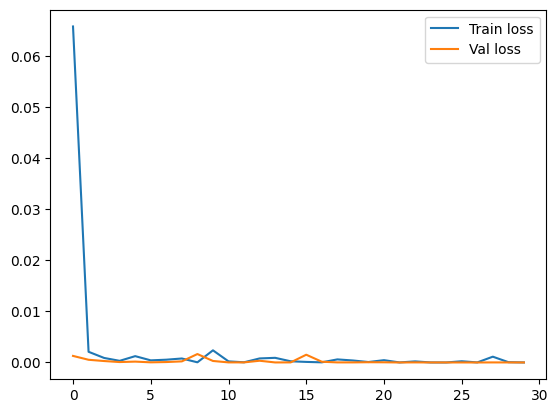

In [959]:
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Val loss")
plt.legend()
plt.show()

In [960]:
model.eval()
with torch.no_grad():
    outputs = model(torch.tensor(X_test, dtype=torch.float32))
    preds = torch.sigmoid(outputs)
    preds = (preds > 0.5).int()

y_true = torch.tensor(y_test).int()
y_pred = preds.squeeze().cpu().numpy()
y_true = y_true.cpu().numpy()

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7731
F1 Score: 0.8720
Confusion Matrix:
[[    0  3464]
 [    0 11801]]


##### Evaluating the model on the test set
- We use `Accuracy`, `F1 score` and `Confusion matrix` to assess performance and verify whether overfitting has occurred